<a href="https://colab.research.google.com/github/JoeArmel/JoeArmel/blob/main/OCR_WORDS_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSE DES MOTS ECRITS A LA MAIN

## Création d'un dataframe contenant les chemin d'accès aux différents fichiers

In [ ]:
import os
import glob
import pathlib
import pandas as pd

### Indication du chemin d'accès aux différentes images et décompte de celles-ci.

In [ ]:
# Chemin d'accès aux fichiers de phrases. Ce sont tous des fichiers .png
myDir = "C:\Armel\DATASCIENTEST\Formation\Projet OCR\words"


# Trouver toutes les chemins vers les fichiers qui finissent par .png
data_dir = pathlib.Path(myDir)
words = sorted(list(map(str, list(data_dir.glob("*/*/*.png")))))

# Nombre de fichiers trouvés
words_count = len(words)
print('Nombre de fichiers images de mots :',words_count)

Nombre de fichiers images de mots : 115318


### Construction d'un premier dataframe contenant les chemins d'accès et le nom des fichiers 

In [ ]:
# Extraction du label de chaque image
images = list(map(lambda x : [x, x.split('\\')[-1].split(".png")[0]], words))

In [ ]:
# Création d'un dataframe
df = pd.DataFrame(images, columns=['filepath', 'words_id'])

df.head()

,filepath,words_id
0,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-00
1,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-01
2,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-02
3,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-03
4,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-04


### Exploitation du fichier xml pour la construction d'un second dataframe [nom du fichier, transcription]

<ul> Cette exploitation a pour objectif de coupler la transcription du mot contenu dans l'image, au nom du fichier de ladite image. </ul>

In [ ]:
#lecture du fichier XML créé précédement
fichier_xml = './xml.csv'
fichier = pd.read_csv(fichier_xml,index_col=[0])

# Création du dataframe
df1 = fichier[['id','text']]
df1 = df1.rename({'id':'words_id','text':'words'}, axis = 1)

#### Suppression des doulons.
df1 = df_1.drop_duplicates()

#### Tri par ordre croissant par rapport à la colonne 'words_id'.
df1 = df1.sort_values(by ='words_id', axis= 0)

# Couplage des deux dataframes et création de notre dataset.
data = pd.merge(df, df1, on = ['words_id'])
data.head()

,filepath,words_id,words
0,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-00,A
1,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-01,MOVE
2,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-02,to
3,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-03,stop
4,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-04,Mr.


<ul> Ici nous avons choisi la méthode <b>'inner'</b> pour le couplage des deux dataframes car tous les fichiers semblent ne pas avoir de transcription.</ul>
<ul> Ce qui parait logique vue la segmentation n'a pas été correcte pour tous les mots de chaque formulaire.</ul>
<ul> Nous nous restreignons par conséquent aux fichiers dont la segmentation a été correcte.</ul> 

In [ ]:
data['label'] = data['words'].replace(data.words.unique(), [*range(len(data.words.unique()))])
data.head(10)

,filepath,words_id,words,label
0,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-00,A,0
1,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-01,MOVE,1
2,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-02,to,2
3,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-03,stop,3
4,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-04,Mr.,4
5,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-05,Gaitskell,5
6,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-00-06,from,6
7,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-01-00,nominating,7
8,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-01-01,any,8
9,C:\Armel\DATASCIENTEST\Formation\Projet OCR\wo...,a01-000u-01-02,more,9


## VISUALISATION DE QUELQUES IMAGES AVEC LEUR TRANSCRIPTION

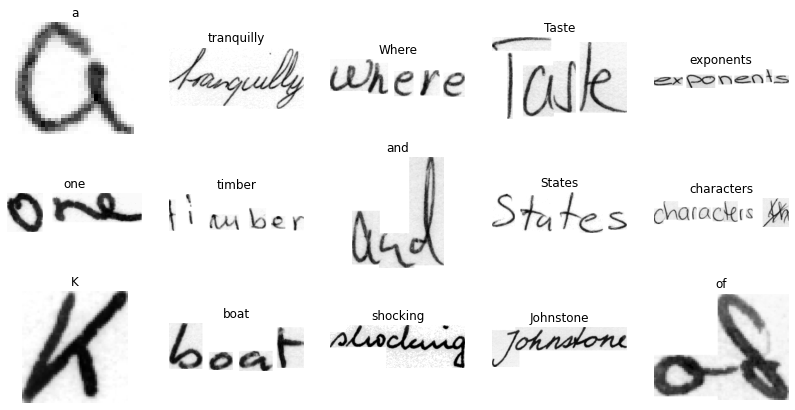

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import numpy as np

#Visualisation aléatoire de quelques données images.
plt.figure(figsize=(14, 7))

j=1
for i in np.random.choice(range(data.shape[0]), size = 15):
    ax = plt.subplot(3, 5, j)
    plt.imshow(imread(data.filepath[i]), cmap='gray')
    plt.title(data.words[i])
    j+=1
    plt.axis("off")

In [ ]:
# Autre visualisation

plt.figure(figsize=(14, 7))

j=1
for i in np.random.choice(range(data.shape[0]), size = 15):
    ax = plt.subplot(3, 5, j)
    
    # Lecture du fichier numéro i
    im = tf.io.read_file(data.filepath[i])
    # Decodage du fichier numéro i
    im = tf.image.decode_png(im, channels=1)
    # visualisation du tenseur
    plt.imshow(im)
    j+=1
    plt.axis("off")

## Preprocessing

In [ ]:
len(data.words.unique())

13550

### Encodage et uniformisation de l'encodage des mots 

In [ ]:
import string
from tensorflow import keras

<ul> La fonction definie ci-dessous va permettre d'encoder chaque caractère présent dans la transcription de chaque image. L'objectif ici étant de pouvoir encoder chaque mot transcrit à l'aide des différents caractères qui le constituent.</ul>

In [ ]:
# char_list:   'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# total number of our output classes: len(char_list)
char_list = string.ascii_letters+string.digits

def encode_to_labels(txt):
    ''' Cette fonction transforme un mot en une liste de nombres.
    chaque nombre indique le rang de la lettre qu'il remplace.
    La liste a la même longueur que le mot qu'il représente.    ''' 
    
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
        
    return dig_lst

In [ ]:
def get_max_label_len(liste):
        
        '''Cette fonction identifie le mot le plus long dans une liste de mots.'''
        
        max_label_len = 0
        
        for index in range(len(liste)):
            txt = liste[index]
            
            if len(txt) > max_label_len:
                max_label_len = len(txt)
                
        return max_label_len

<ul>A présent, nous allons appliquer ces deux fonctions au dataframe 'data' en vue de l'encodage de la colonne 'words'.</ul>

In [ ]:
# Nous commençons par encoder chaque mot à l'aide de la fonction encode_to_labels

data['encoded_words'] = data.words.apply(lambda txt: encode_to_labels(txt))

# Nous notons ensuite la valeur du plus long encodage grâce à la fonction get_max_label_len
max_label_len = get_max_label_len(data['encoded_words'])

#### Uniformisation de l'encodage

In [ ]:
# Nous créons ici un array numpy pour procéder à l'uniformisation de l'encodage 
liste = data['encoded_words'].to_numpy()

# Uniformisation

pad_words = keras.preprocessing.sequence.pad_sequences(liste, maxlen= max_label_len, padding='post', value = len(char_list))

#### Mise à jour du dataframe avec l'encodage uniformisé

In [ ]:
# Duplication de la colonne ['encoded_words'] avec pour titre ['padded_words']

data['padded_words'] = data['encoded_words']


# Mise à jour de la colonne ['padded_words']

for index in range(len(data['padded_words'])):
    data['padded_words'][index] = pad_words[index]

In [ ]:
img_height = 32
img_width = 128

# Conversion de chaque image en image de dimension (32, 128, 1)
        h, w = img.shape
        if w > 128 or h > 32:
            continue
        if h < 32:
            add_zeros = np.ones((w, 32-h))*255
            img = np.concatenate((img, add_zeros), axis = 1)
 
        if w < 128:
            add_zeros = np.ones((128-w, 32))*255
            img = np.concatenate((img, add_zeros))
        img = np.expand_dims(img , axis = 2)
        
# Normaliser chaque image
        img = img/255.

In [ ]:
# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
 
#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []
 
max_label_len = 0
 
i =1 
flag = 0

for root, dirnames, filenames in os.walk(path):
 
    for f_name in fnmatch.filter(filenames, '*.jpg'):
        # read input image and convert into gray scale image
        img = cv2.cvtColor(cv2.imread(os.path.join(root, f_name)), cv2.COLOR_BGR2GRAY)   
 
        # convert each image of shape (32, 128, 1)
        w, h = img.shape
        if h > 128 or w > 32:
            continue
        if w < 32:
            add_zeros = np.ones((32-w, h))*255
            img = np.concatenate((img, add_zeros))
 
        if h < 128:
            add_zeros = np.ones((32, 128-h))*255
            img = np.concatenate((img, add_zeros), axis=1)
        img = np.expand_dims(img , axis = 2)
        
        # Normalize each image
        img = img/255.
        
        # get the text from the image
        txt = f_name.split('_')[1]
        
        # compute maximum length of the text
        if len(txt) > max_label_len:
            max_label_len = len(txt)
            
           
        # split the 150000 data into validation and training dataset as 10% and 90% respectively
        if i%10 == 0:     
            valid_orig_txt.append(txt)   
            valid_label_length.append(len(txt))
            valid_input_length.append(31)
            valid_img.append(img)
            valid_txt.append(encode_to_labels(txt))
        else:
            orig_txt.append(txt)   
            train_label_length.append(len(txt))
            train_input_length.append(31)
            training_img.append(img)
            training_txt.append(encode_to_labels(txt)) 
        
        # break the loop if total data is 150000
        if i == 150000:
            flag = 1
            break
        i+=1
    if flag == 1:
        break
        
# pad each output label to maximum text length
 
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = len(char_list))
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = len(char_list))


In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

In [ ]:
X_train_path, X_test_path, y_train, y_test = train_test_split(data.filepath, data.label, train_size = .8, random_state = 1234)

# On charge les images de X_test_path redimensionnées à [128, 32, 1] en mémoire dans la variable X_test.
X_test = []
for filepath in tqdm(X_test_path):
    # Read the file
    im = tf.io.read_file(filepath)
    # Decode the file
    im = tf.image.decode_png(im, channels=1)
    # Resizing
    im = tf.image.resize(im, size=(128, 32))
    X_test.append([im])
    
X_test = tf.concat(X_test, axis=0)

100%|██████████| 23038/23038 [01:15<00:00, 304.73it/s]


In [ ]:
# Fonction load_image avec comme argument filepath retournant une image redimensionnée en (80,120).
def load_image(filepath, resize=(128, 32)):
    im = tf.io.read_file(filepath)
    im = tf.image.decode_png(im, channels=1)
    return tf.image.resize(im, resize)


# Définition d'un dataset dataset_train de (X_train_path, y_train) à l'aide de la fonction from_tensor_slices.
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))


AUTOTUNE = tf.data.experimental.AUTOTUNE

# Application de load_image à X_train_path ## argument num_parallel_calls = AUTOTUNE (multi-tasking)

dataset_train = dataset_train.map(lambda x, y : [load_image(x), y], num_parallel_calls = AUTOTUNE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
batch_size = 200

def configure_for_performance(ds):
    ds = ds.cache()                                      #
    ds = ds.shuffle(buffer_size=1000)                    # Mélange de façon aléatoire le jeu de données
    ds = ds.batch(batch_size)                            # Regrouper les observations sous forme de batch de taille 200
    ds = ds.prefetch(buffer_size=AUTOTUNE)               #
    return ds

dataset_train = configure_for_performance(dataset_train)
#val_ds = configure_for_performance(val_ds)

# Le modèle

In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, MaxPooling2D, LeakyReLU, Lambda, Dense, Dropout
from tensorflow.keras.layers import GRU, Bidirectional
from keras.utils.vis_utils import plot_model
numHidden = 256
alphabet = ' abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
# input with shape of height=32 and width=128 
inputs = Input(shape=)

model = tf.keras.Sequential()

# Convolution Part : Extraction Feature

# Layer 1
model.add(Conv2D(64, (3,3), input_shape = (32, 128, 1), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

# Layer 2
model.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

# Layer 3
model.add(Conv2D(256, (3,3), activation = 'relu', padding='same'))

# Layer 4
model.add(Conv2D(256, (3,3), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size = (2, 1)))

# Layer 5
model.add(Conv2D(512, (3,3), activation = 'relu', padding='same'))
model.add(BatchNormalization())

# Layer 6
model.add(Conv2D(512, (3,3), activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 1)))

# Layer 7
model.add(Conv2D(512, (2,2), activation = 'relu'))
model.add(Lambda(lambda x: K.squeeze(x, 1)))


# bidirectional LSTM layers with units=128
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
 
model.add(Dense(len(char_list)+1, activation = 'softmax'))
 
act_model = Model(inputs, outputs)

In [ ]:
def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(len(characters) + 1, activation="softmax", name="dense2")(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

In [ ]:
Définitionde de la fonction de perte CTC

In [ ]:
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
 
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 

loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [ ]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [ ]:
model_ocr = tf.keras.Sequential()

# Convolution Part : Extraction Feature
# Layer 1
model_ocr.add(Conv2D(filters=32, kernel_size=(5,5), padding='SAME', input_shape = (128, 32, 1)))
model_ocr.add(BatchNormalization())
model_ocr.add(LeakyReLU())
model_ocr.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Layer 2
model_ocr.add(Conv2D(filters=64, kernel_size=(5,5), padding='SAME'))
model_ocr.add(BatchNormalization())
model_ocr.add(LeakyReLU())
model_ocr.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Layer 3
model_ocr.add(Conv2D(filters=128, kernel_size=(3,3), padding='SAME'))
model_ocr.add(BatchNormalization())
model_ocr.add(LeakyReLU())
model_ocr.add(MaxPooling2D(pool_size=(1,2), strides=(1,2)))

# Layer 4
model_ocr.add(Conv2D(filters=128, kernel_size=(3,3), padding='SAME'))
model_ocr.add(BatchNormalization())
model_ocr.add(LeakyReLU())
model_ocr.add(MaxPooling2D(pool_size=(1,2), strides=(1,2)))

# Layer 5
model_ocr.add(Conv2D(filters=256, kernel_size=(3,3), padding='SAME'))
model_ocr.add(BatchNormalization())
model_ocr.add(LeakyReLU())
model_ocr.add(MaxPooling2D(pool_size=(1,2), strides=(1,2)))

# Recurrent Neural Part : Extraction Feature
# Remove axis 2
model_ocr.add(Lambda(lambda x :tf.squeeze(x, axis = 2)))

# Bidirectionnal RNN
model_ocr.add(Bidirectional(GRU(numHidden, return_sequences=True)))

# Classification of characters
model_ocr.add(Dense(len(alphabet)+1))

model_ocr.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 32, 32)       832       
_________________________________________________________________
batch_normalization_20 (Batc (None, 128, 32, 32)       128       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 128, 32, 32)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 16, 64)        51264     
_________________________________________________________________
batch_normalization_21 (Batc (None, 64, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 64, 16, 64)       

In [ ]:
model_ocr.compile(optimizer='adam',
             loss = 'ctc_loss_prepare_fn',
             metrics = ['accuracy'])

# Entrainement

In [ ]:
from tensorflow.keras import callbacks

# Sauvegarde des poids à chaque epoch
checkpoint = callbacks.ModelCheckpoint(filepath = 'checkpoint', 
                                       monitor = 'val_loss',
                                       save_best_only = True,
                                       save_weights_only = False,
                                       mode = 'min',
                                       save_freq = 'epoch')

# Callback pour diminuer le learning rate si la métrique de validation ne s'améliore pas dans les 5 dernières époques.
lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                         patience=5,
                                         factor=0.1,
                                         verbose=2,
                                         mode='min')

# Entraînement du modèle à l'aide la méthode fit sur 10 epochs
model.fit(dataset_train,
          epochs=10, 
          validation_data=(X_test, y_test), 
          callbacks = [lr_plateau, checkpoint])

,filepath,words_id,words


In [ ]:
# char_list:   'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# total number of our output classes: len(char_list)
char_list = string.ascii_letters+string.digits

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
        
    return dig_lst

In [ ]:
model_ocr = tf.keras.Sequential()